<a href="https://colab.research.google.com/github/col-ini/BigData_FinalProject/blob/main/%EC%B5%9C%EC%9A%B0%EC%84%B1_%EC%A0%84%EB%8F%99%ED%98%84_%EB%B9%85%EB%8D%B0%EC%9D%B4%ED%84%B0_%EA%B8%B0%EB%A7%90%EA%B3%BC%EC%A0%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import scipy as sp
import scipy.stats
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt
import sklearn.preprocessing as preprocessing

from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [3]:
df = pd.read_csv(r'/content/drive/MyDrive/Life Expectancy Data.csv')

In [4]:
df

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


## 1. 데이터 전처리 과정

In [5]:
df.dtypes

Country                             object
Year                                 int64
Status                              object
Life expectancy                    float64
Adult Mortality                    float64
infant deaths                        int64
Alcohol                            float64
percentage expenditure             float64
Hepatitis B                        float64
Measles                              int64
 BMI                               float64
under-five deaths                    int64
Polio                              float64
Total expenditure                  float64
Diphtheria                         float64
 HIV/AIDS                          float64
GDP                                float64
Population                         float64
 thinness  1-19 years              float64
 thinness 5-9 years                float64
Income composition of resources    float64
Schooling                          float64
dtype: object

In [6]:
df.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [7]:
columns = ['Country', 'Year', 'Status', 'LifeExpectancy', 'AdultMortality',
       'InfantDeaths', 'Alcohol', 'PercentageExpenditure', 'HepatitisB',
       'Measles', 'BMI', 'UnderFiveDeaths', 'Polio', 'TotalExpenditure',
       'Diphtheria', 'HIV/AIDS', 'GDP', 'Population',
       'Thinness1-19Years', 'Thinness5-9Years',
       'IncomeCompositionOfResources', 'Schooling']

In [8]:
df.columns = columns
df

,Country,Year,Status,LifeExpectancy,AdultMortality,InfantDeaths,Alcohol,PercentageExpenditure,HepatitisB,Measles,...,Polio,TotalExpenditure,Diphtheria,HIV/AIDS,GDP,Population,Thinness1-19Years,Thinness5-9Years,IncomeCompositionOfResources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


In [9]:
for i in df.columns :
  print(i)
  print(df[i].value_counts())
  print()

Country
Afghanistan              16
Peru                     16
Nicaragua                16
Niger                    16
Nigeria                  16
                         ..
Niue                      1
San Marino                1
Nauru                     1
Saint Kitts and Nevis     1
Dominica                  1
Name: Country, Length: 193, dtype: int64

Year
2013    193
2015    183
2014    183
2012    183
2011    183
2010    183
2009    183
2008    183
2007    183
2006    183
2005    183
2004    183
2003    183
2002    183
2001    183
2000    183
Name: Year, dtype: int64

Status
Developing    2426
Developed      512
Name: Status, dtype: int64

LifeExpectancy
73.0    45
75.0    33
78.0    31
73.6    28
73.9    25
        ..
43.1     1
49.5     1
49.0     1
55.1     1
45.4     1
Name: LifeExpectancy, Length: 362, dtype: int64

AdultMortality
12.0     34
14.0     30
16.0     29
11.0     25
138.0    25
         ..
666.0     1
675.0     1
654.0     1
633.0     1
665.0     1
Name: AdultMor

In [10]:
#면역관련 : hepatis B, polio, diphtheria
#사망률 : adult mortality, infant deaths, measles, under-five-deaths, hiv/aids
#경제적 : percentage expenditure, total expenditure, gdp
#사회적 : schooling, income composition,  population
#etc : alcohol, bmi,, thinness 1-19, thinness5-9, --> 삭제

In [11]:
#column 재배치 --> 면역관련, 사망률, 경제, 사회 순으로

In [12]:
df = df.drop(['Country', 'Status', 'Year', 'Alcohol', 'BMI', 'Thinness1-19Years', 'Thinness5-9Years'], axis = 1)

In [13]:
data1 = df[['HepatitisB', 'Polio', 'Diphtheria', 'AdultMortality', 'InfantDeaths', 'Measles', 'UnderFiveDeaths', 'HIV/AIDS', 'PercentageExpenditure', 'TotalExpenditure', 'GDP', 'Schooling', 'IncomeCompositionOfResources', 'Population', 'LifeExpectancy']]
data1

,HepatitisB,Polio,Diphtheria,AdultMortality,InfantDeaths,Measles,UnderFiveDeaths,HIV/AIDS,PercentageExpenditure,TotalExpenditure,GDP,Schooling,IncomeCompositionOfResources,Population,LifeExpectancy
0,65.0,6.0,65.0,263.0,62,1154,83,0.1,71.279624,8.16,584.259210,10.1,0.479,33736494.0,65.0
1,62.0,58.0,62.0,271.0,64,492,86,0.1,73.523582,8.18,612.696514,10.0,0.476,327582.0,59.9
2,64.0,62.0,64.0,268.0,66,430,89,0.1,73.219243,8.13,631.744976,9.9,0.470,31731688.0,59.9
3,67.0,67.0,67.0,272.0,69,2787,93,0.1,78.184215,8.52,669.959000,9.8,0.463,3696958.0,59.5
4,68.0,68.0,68.0,275.0,71,3013,97,0.1,7.097109,7.87,63.537231,9.5,0.454,2978599.0,59.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,68.0,67.0,65.0,723.0,27,31,42,33.6,0.000000,7.13,454.366654,9.2,0.407,12777511.0,44.3
2934,7.0,7.0,68.0,715.0,26,998,41,36.7,0.000000,6.52,453.351155,9.5,0.418,12633897.0,44.5
2935,73.0,73.0,71.0,73.0,25,304,40,39.8,0.000000,6.53,57.348340,10.0,0.427,125525.0,44.8
2936,76.0,76.0,75.0,686.0,25,529,39,42.1,0.000000,6.16,548.587312,9.8,0.427,12366165.0,45.3


In [14]:
#결측치 확인

In [15]:
data1.isnull().sum()

HepatitisB                      553
Polio                            19
Diphtheria                       19
AdultMortality                   10
InfantDeaths                      0
Measles                           0
UnderFiveDeaths                   0
HIV/AIDS                          0
PercentageExpenditure             0
TotalExpenditure                226
GDP                             448
Schooling                       163
IncomeCompositionOfResources    167
Population                      652
LifeExpectancy                   10
dtype: int64

In [16]:
data1 = data1.dropna()
data1

,HepatitisB,Polio,Diphtheria,AdultMortality,InfantDeaths,Measles,UnderFiveDeaths,HIV/AIDS,PercentageExpenditure,TotalExpenditure,GDP,Schooling,IncomeCompositionOfResources,Population,LifeExpectancy
0,65.0,6.0,65.0,263.0,62,1154,83,0.1,71.279624,8.16,584.259210,10.1,0.479,33736494.0,65.0
1,62.0,58.0,62.0,271.0,64,492,86,0.1,73.523582,8.18,612.696514,10.0,0.476,327582.0,59.9
2,64.0,62.0,64.0,268.0,66,430,89,0.1,73.219243,8.13,631.744976,9.9,0.470,31731688.0,59.9
3,67.0,67.0,67.0,272.0,69,2787,93,0.1,78.184215,8.52,669.959000,9.8,0.463,3696958.0,59.5
4,68.0,68.0,68.0,275.0,71,3013,97,0.1,7.097109,7.87,63.537231,9.5,0.454,2978599.0,59.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,68.0,67.0,65.0,723.0,27,31,42,33.6,0.000000,7.13,454.366654,9.2,0.407,12777511.0,44.3
2934,7.0,7.0,68.0,715.0,26,998,41,36.7,0.000000,6.52,453.351155,9.5,0.418,12633897.0,44.5
2935,73.0,73.0,71.0,73.0,25,304,40,39.8,0.000000,6.53,57.348340,10.0,0.427,125525.0,44.8
2936,76.0,76.0,75.0,686.0,25,529,39,42.1,0.000000,6.16,548.587312,9.8,0.427,12366165.0,45.3


In [17]:
data1.isnull().sum()

HepatitisB                      0
Polio                           0
Diphtheria                      0
AdultMortality                  0
InfantDeaths                    0
Measles                         0
UnderFiveDeaths                 0
HIV/AIDS                        0
PercentageExpenditure           0
TotalExpenditure                0
GDP                             0
Schooling                       0
IncomeCompositionOfResources    0
Population                      0
LifeExpectancy                  0
dtype: int64

In [18]:
corr = data1.corr()
corr

,HepatitisB,Polio,Diphtheria,AdultMortality,InfantDeaths,Measles,UnderFiveDeaths,HIV/AIDS,PercentageExpenditure,TotalExpenditure,GDP,Schooling,IncomeCompositionOfResources,Population,LifeExpectancy
HepatitisB,1.000000,0.461385,0.585901,-0.103179,-0.231350,-0.123448,-0.240446,-0.093732,0.017577,0.116720,0.042634,0.216562,0.186210,-0.128327,0.200082
Polio,0.461385,1.000000,0.612166,-0.199438,-0.156685,-0.057071,-0.170930,-0.107096,0.128580,0.118586,0.156717,0.347453,0.314027,-0.045483,0.326638
Diphtheria,0.585901,0.612166,1.000000,-0.191100,-0.161596,-0.057791,-0.178176,-0.116690,0.134750,0.128538,0.158347,0.347888,0.342466,-0.040028,0.340601
AdultMortality,-0.103179,-0.199438,-0.191100,1.000000,0.043007,-0.003868,0.061016,0.549073,-0.237996,-0.082599,-0.255475,-0.420683,-0.442725,-0.014426,-0.701994
InfantDeaths,-0.231350,-0.156685,-0.161596,0.043007,1.000000,0.532421,0.996899,0.007283,-0.091202,-0.145920,-0.098580,-0.214823,-0.135807,0.671650,-0.169851
Measles,-0.123448,-0.057071,-0.057791,-0.003868,0.532421,1.000000,0.517197,-0.003487,-0.062963,-0.112825,-0.064658,-0.114053,-0.057932,0.321762,-0.068614
UnderFiveDeaths,-0.240446,-0.170930,-0.178176,0.061016,0.996899,0.517197,1.000000,0.018953,-0.092687,-0.144669,-0.100923,-0.226911,-0.149401,0.658546,-0.193204
HIV/AIDS,-0.093732,-0.107096,-0.116690,0.549073,0.007283,-0.003487,0.018953,1.000000,-0.094491,0.042244,-0.107398,-0.206119,-0.246184,-0.027962,-0.589850
PercentageExpenditure,0.017577,0.128580,0.134750,-0.237996,-0.091202,-0.062963,-0.092687,-0.094491,1.000000,0.182595,0.959321,0.420911,0.402775,-0.016946,0.410205
TotalExpenditure,0.116720,0.118586,0.128538,-0.082599,-0.145920,-0.112825,-0.144669,0.042244,0.182595,1.000000,0.178994,0.235788,0.180514,-0.078877,0.171767


## 2. 회기분석

In [19]:
data1.describe()

,HepatitisB,Polio,Diphtheria,AdultMortality,InfantDeaths,Measles,UnderFiveDeaths,HIV/AIDS,PercentageExpenditure,TotalExpenditure,GDP,Schooling,IncomeCompositionOfResources,Population,LifeExpectancy
count,1659.000000,1659.000000,1659.000000,1659.000000,1659.000000,1659.000000,1659.000000,1659.000000,1659.000000,1659.000000,1659.000000,1659.000000,1659.000000,1.659000e+03,1659.000000
mean,79.163954,83.534659,84.122966,168.539482,32.734780,2223.402652,44.515371,1.973599,695.604467,5.962049,5541.147149,12.087101,0.630486,1.469825e+07,69.263653
std,25.638898,22.463437,21.598666,125.106474,120.504952,10057.549110,162.450680,6.015588,1754.461268,2.299131,11445.760235,2.818743,0.183054,7.026067e+07,8.785205
min,2.000000,3.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.100000,0.000000,0.740000,1.681350,4.200000,0.000000,3.400000e+01,44.000000
25%,74.000000,81.000000,81.500000,77.000000,1.000000,0.000000,1.000000,0.100000,37.706573,4.410000,464.018634,10.300000,0.507000,1.966205e+05,64.300000
50%,89.000000,93.000000,92.000000,149.000000,3.000000,15.000000,4.000000,0.100000,145.102253,5.840000,1589.827130,12.300000,0.672000,1.428588e+06,71.600000
75%,96.000000,97.000000,97.000000,228.500000,23.000000,376.000000,32.000000,0.700000,508.647501,7.485000,4705.360028,13.900000,0.750000,7.795638e+06,74.950000
max,99.000000,99.000000,99.000000,723.000000,1600.000000,131441.000000,2100.000000,50.600000,18961.348600,14.390000,119172.741800,20.700000,0.936000,1.293859e+09,89.000000


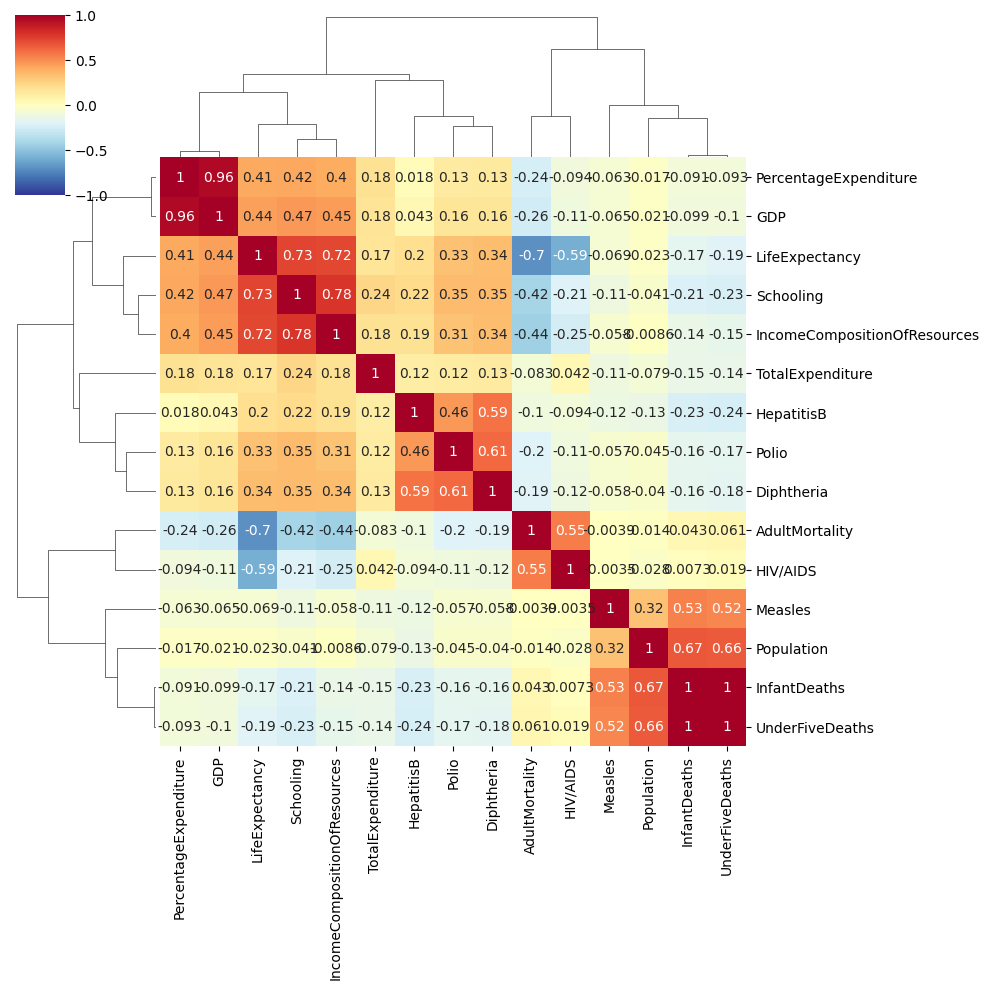

In [20]:
sns.clustermap(corr,
               annot = True,      # 실제 값 화면에 나타내기
               cmap = 'RdYlBu_r',  # Red, Yellow, Blue 색상으로 표시
               vmin = -1, vmax = 1, #컬러차트 -1 ~ 1 범위로 표시
              )

In [21]:
#데이터 분리

In [22]:
X = data1.loc[:, ['HepatitisB', 'Polio', 'Diphtheria', 'AdultMortality', 'InfantDeaths', 'Measles', 'UnderFiveDeaths', 'HIV/AIDS', 'PercentageExpenditure', 'TotalExpenditure', 'GDP', 'Schooling', 'IncomeCompositionOfResources', 'Population']]
y = data1.loc[:, ['LifeExpectancy']]

In [23]:
#상수항 추가

In [24]:
X = sm.add_constant(X, has_constant = "add")

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

X_train.shape

(1327, 15)

In [26]:
X_train.columns

Index(['const', 'HepatitisB', 'Polio', 'Diphtheria', 'AdultMortality',
       'InfantDeaths', 'Measles', 'UnderFiveDeaths', 'HIV/AIDS',
       'PercentageExpenditure', 'TotalExpenditure', 'GDP', 'Schooling',
       'IncomeCompositionOfResources', 'Population'],
      dtype='object')

In [27]:
lm = sm.OLS(y_train, X_train)
lm_train = lm.fit()

lm_train.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         LifeExpectancy   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     432.8
Date:                Mon, 11 Dec 2023   Prob (F-statistic):               0.00
Time:                        04:08:34   Log-Likelihood:                -3605.4
No. Observations:                1327   AIC:                             7241.
Df Residuals:                    1312   BIC:                             7319.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                           53.7995      0.737     73.022      0.000      52.354      55.245
HepatitisB                      -0.0069      0.005     -1.397      0.163      -0.017       0.003
Polio                            0.0114      0.006      1.942      0.052      -0.000       0.023
Diphtheria                       0.0062      0.007      0.919      0.358      -0.007       0.019
AdultMortality                  -0.0178      0.001    -16.204      0.000      -0.020      -0.016
InfantDeaths                     0.1073      0.013      8.422      0.000       0.082       0.132
Measles                      -3.709e-06   1.17e-05     -0.316      0.752   -2.67e-05    1.93e-05
UnderFiveDeaths                 -0.0827      0.009     -8.877      0.000      -0.101      -0.064
HIV/AIDS                        -0.4447      0.021    -20.971      0.000      -0.486      -0.403
PercentageExpenditure            0.0004      0.000      1.885      0.060   -1.52e-05       0.001
TotalExpenditure                 0.1398      0.046      3.051      0.002       0.050       0.230
GDP                           1.654e-05   3.16e-05      0.523      0.601   -4.55e-05    7.85e-05
Schooling                        0.9001      0.061     14.702      0.000       0.780       1.020
IncomeCompositionOfResources    10.3598      0.913     11.348      0.000       8.569      12.151
Population                    1.272e-09   2.33e-09      0.546      0.585    -3.3e-09    5.84e-09
==============================================================================
Omnibus:                       28.540   Durbin-Watson:                   2.058
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               52.360
Skew:                          -0.124   Prob(JB):                     4.27e-12
Kurtosis:                       3.941   Cond. No.                     5.62e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.62e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## 3-1. 독립성(다중공선성)

In [28]:
vif_data = pd.DataFrame()
X_data = X.drop(columns='const', axis =1)
vif_data["feature"] = X_data.columns

In [29]:
vif_data["VIF"] = [variance_inflation_factor(X_data.values, i) for i in range(len(X_data.columns))]

In [30]:
print(vif_data) ## VIF>10...multi collinearity에 문제가 있다.

                         feature         VIF
0                     HepatitisB   16.993041
1                          Polio   24.565839
2                     Diphtheria   32.788939
3                 AdultMortality    3.845913
4                   InfantDeaths  214.941459
5                        Measles    1.545217
6                UnderFiveDeaths  204.829454
7                       HIV/AIDS    1.600821
8          PercentageExpenditure   14.802820
9               TotalExpenditure    8.036292
10                           GDP   16.389562
11                     Schooling   48.852161
12  IncomeCompositionOfResources   36.037121
13                    Population    2.007613


In [31]:
data2 = df.drop(['HepatitisB', 'Polio', 'InfantDeaths', 'TotalExpenditure', 'Schooling'], axis = 1)
data2

,LifeExpectancy,AdultMortality,PercentageExpenditure,Measles,UnderFiveDeaths,Diphtheria,HIV/AIDS,GDP,Population,IncomeCompositionOfResources
0,65.0,263.0,71.279624,1154,83,65.0,0.1,584.259210,33736494.0,0.479
1,59.9,271.0,73.523582,492,86,62.0,0.1,612.696514,327582.0,0.476
2,59.9,268.0,73.219243,430,89,64.0,0.1,631.744976,31731688.0,0.470
3,59.5,272.0,78.184215,2787,93,67.0,0.1,669.959000,3696958.0,0.463
4,59.2,275.0,7.097109,3013,97,68.0,0.1,63.537231,2978599.0,0.454
...,...,...,...,...,...,...,...,...,...,...
2933,44.3,723.0,0.000000,31,42,65.0,33.6,454.366654,12777511.0,0.407
2934,44.5,715.0,0.000000,998,41,68.0,36.7,453.351155,12633897.0,0.418
2935,44.8,73.0,0.000000,304,40,71.0,39.8,57.348340,125525.0,0.427
2936,45.3,686.0,0.000000,529,39,75.0,42.1,548.587312,12366165.0,0.427


In [32]:
data2 = data2.dropna()
data2

,LifeExpectancy,AdultMortality,PercentageExpenditure,Measles,UnderFiveDeaths,Diphtheria,HIV/AIDS,GDP,Population,IncomeCompositionOfResources
0,65.0,263.0,71.279624,1154,83,65.0,0.1,584.259210,33736494.0,0.479
1,59.9,271.0,73.523582,492,86,62.0,0.1,612.696514,327582.0,0.476
2,59.9,268.0,73.219243,430,89,64.0,0.1,631.744976,31731688.0,0.470
3,59.5,272.0,78.184215,2787,93,67.0,0.1,669.959000,3696958.0,0.463
4,59.2,275.0,7.097109,3013,97,68.0,0.1,63.537231,2978599.0,0.454
...,...,...,...,...,...,...,...,...,...,...
2933,44.3,723.0,0.000000,31,42,65.0,33.6,454.366654,12777511.0,0.407
2934,44.5,715.0,0.000000,998,41,68.0,36.7,453.351155,12633897.0,0.418
2935,44.8,73.0,0.000000,304,40,71.0,39.8,57.348340,125525.0,0.427
2936,45.3,686.0,0.000000,529,39,75.0,42.1,548.587312,12366165.0,0.427


In [33]:
X1 = data2.loc[:, ['Diphtheria', 'AdultMortality', 'Measles', 'UnderFiveDeaths', 'HIV/AIDS', 'PercentageExpenditure', 'GDP', 'IncomeCompositionOfResources', 'Population']]
y1 = data2.loc[:, ['LifeExpectancy']]

In [34]:
X1 = sm.add_constant(X1, has_constant = "add")

In [35]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size = 0.2, random_state = 5)

X1_train.shape

(1800, 10)

In [36]:
vif_data = pd.DataFrame()
X1_data = X1.drop(columns='const', axis =1)
vif_data["feature"] = X1_data.columns

In [37]:
vif_data["VIF"] = [variance_inflation_factor(X1_data.values, i) for i in range(len(X1_data.columns))]

In [38]:
print(vif_data) ## VIF>10...multi collinearity에 문제가 있다.

                        feature        VIF
0                    Diphtheria  12.159677
1                AdultMortality   3.273690
2                       Measles   1.453295
3               UnderFiveDeaths   1.992468
4                      HIV/AIDS   1.593259
5         PercentageExpenditure   9.618954
6                           GDP  11.106573
7  IncomeCompositionOfResources  12.105573
8                    Population   1.498495


In [39]:
lm1 = sm.OLS(y1_train, X1_train)
lm1_train = lm1.fit()

lm1_train.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         LifeExpectancy   R-squared:                       0.800
Model:                            OLS   Adj. R-squared:                  0.799
Method:                 Least Squares   F-statistic:                     793.6
Date:                Mon, 11 Dec 2023   Prob (F-statistic):               0.00
Time:                        04:08:34   Log-Likelihood:                -5224.6
No. Observations:                1800   AIC:                         1.047e+04
Df Residuals:                    1790   BIC:                         1.052e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                           55.1340      0.551    100.016      0.000      54.053      56.215
Diphtheria                       0.0520      0.005     10.675      0.000       0.042       0.061
AdultMortality                  -0.0201      0.001    -19.013      0.000      -0.022      -0.018
Measles                      -7.078e-06   1.05e-05     -0.674      0.501   -2.77e-05    1.35e-05
UnderFiveDeaths                 -0.0042      0.001     -4.944      0.000      -0.006      -0.003
HIV/AIDS                        -0.4686      0.022    -21.065      0.000      -0.512      -0.425
PercentageExpenditure        -3.921e-06      0.000     -0.030      0.976      -0.000       0.000
GDP                           7.539e-05    2.2e-05      3.421      0.001    3.22e-05       0.000
IncomeCompositionOfResources    21.5471      0.673     32.025      0.000      20.228      22.867
Population                    3.667e-09   1.93e-09      1.904      0.057   -1.11e-10    7.44e-09
==============================================================================
Omnibus:                      135.124   Durbin-Watson:                   1.921
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              614.916
Skew:                           0.184   Prob(JB):                    2.97e-134
Kurtosis:                       5.840   Cond. No.                     5.16e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.16e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## 3-2. 선형성

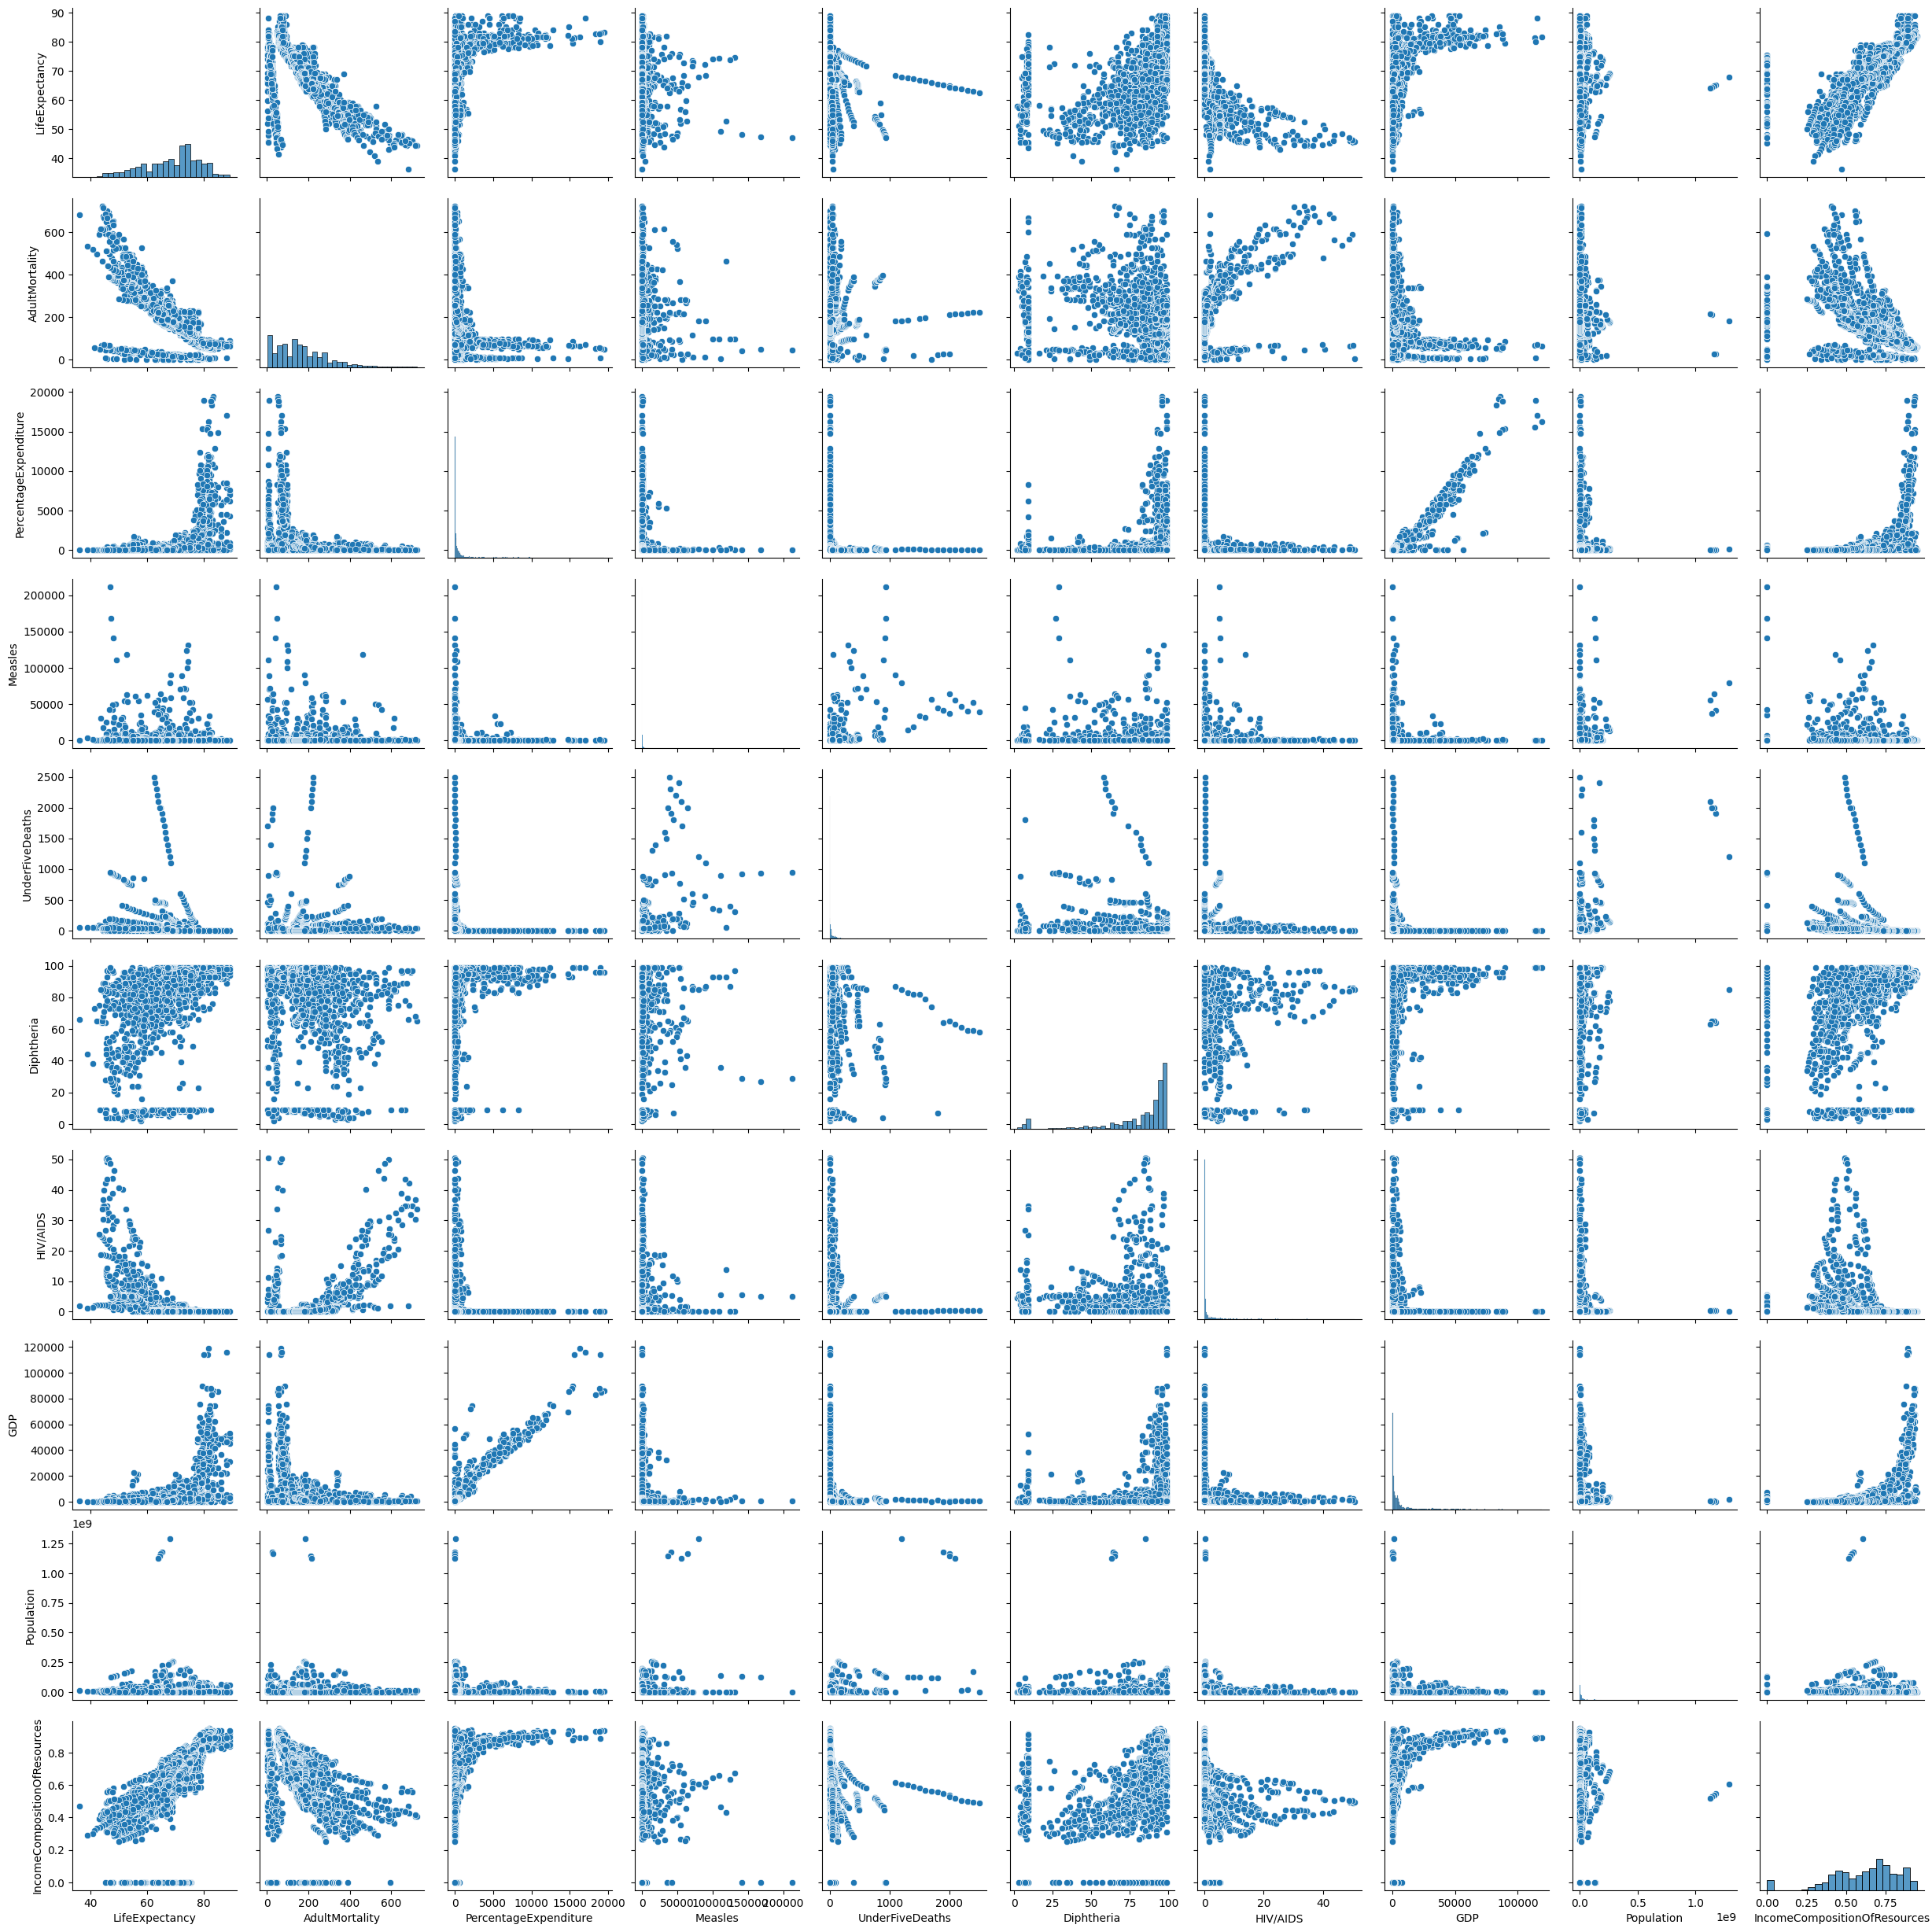

In [40]:
g = sns.pairplot(data2)
plt.show()

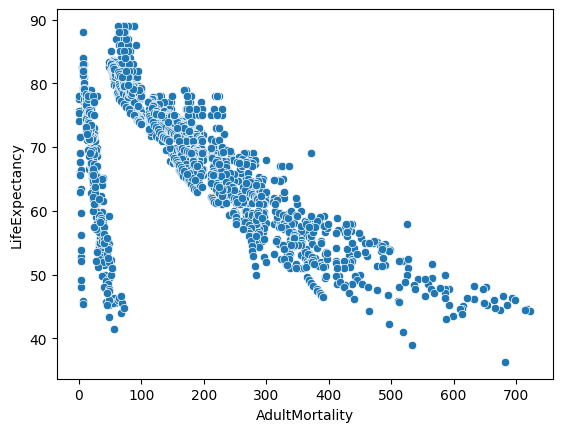

In [41]:
sns.scatterplot(x="AdultMortality", y="LifeExpectancy", data=data2)
plt.show()

In [42]:
model1 = sm.OLS.from_formula("np.log(LifeExpectancy) ~ AdultMortality", data=data2)
result1 = model1.fit()
print(result1.summary())

                              OLS Regression Results                              
Dep. Variable:     np.log(LifeExpectancy)   R-squared:                       0.462
Model:                                OLS   Adj. R-squared:                  0.462
Method:                     Least Squares   F-statistic:                     1934.
Date:                    Mon, 11 Dec 2023   Prob (F-statistic):          2.08e-305
Time:                            04:09:02   Log-Likelihood:                 1746.1
No. Observations:                    2251   AIC:                            -3488.
Df Residuals:                        2249   BIC:                            -3477.
Df Model:                               1                                         
Covariance Type:                nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Inte

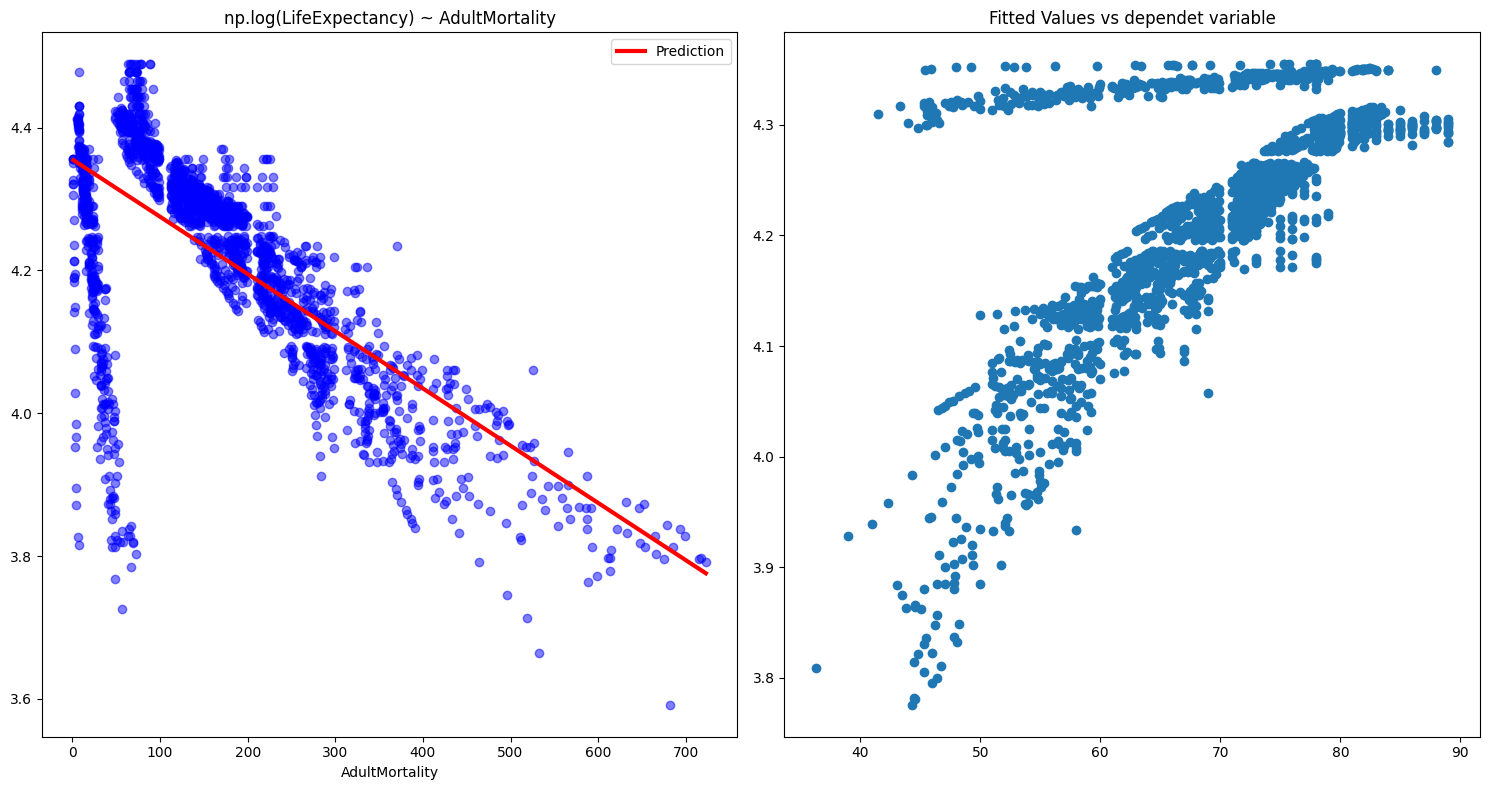

In [43]:
y_hat1 = result1.predict(data2)
df_lin1 = pd.concat([y_hat1, data2.AdultMortality], axis=1).sort_values("AdultMortality")
df_lin1.columns = ["Prediction", "AdultMortality"]

fig, axs = plt.subplots(1,2, figsize=(15,8))

# 독립변수와 종속변수 산점도 및 회귀식
axs[0].plot(data2.AdultMortality, np.log(data2.LifeExpectancy), "bo", alpha=0.5)
df_lin1.plot(x="AdultMortality", y="Prediction", style="r-", lw=3, ax=axs[0])
axs[0].set_title("np.log(LifeExpectancy) ~ AdultMortality")

# 종속변수와 예측치 산점도
axs[1].scatter(data2.LifeExpectancy, y_hat1)
axs[1].set_title("Fitted Values vs dependet variable")

plt.tight_layout()
plt.show()

In [44]:
#잔차 관련 데이터

## 3-3. 잔차의 정규성

In [45]:
y1_predict = lm1_train.predict(X1_test)
residual = y1_test - y1_predict

In [46]:
residual = y1_test.squeeze() - y1_predict

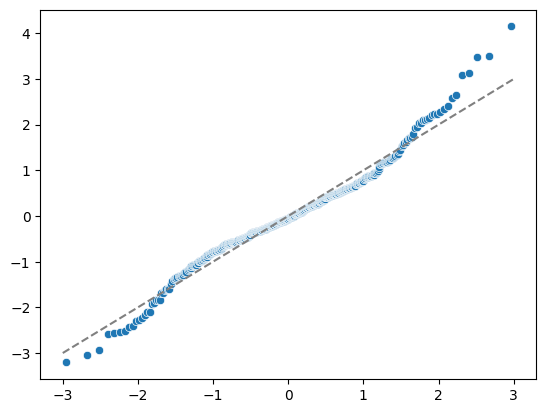

In [47]:
sr = scipy.stats.zscore(residual)
(x, y), _ = scipy.stats.probplot(sr)
sns.scatterplot(x=x, y=y)
plt.plot([-3, 3], [-3, 3], '--', color='grey')

In [48]:
scipy.stats.shapiro(residual)

ShapiroResult(statistic=0.9703935384750366, pvalue=6.549029052393962e-08)

## 3-4. 잔차의 등분산성

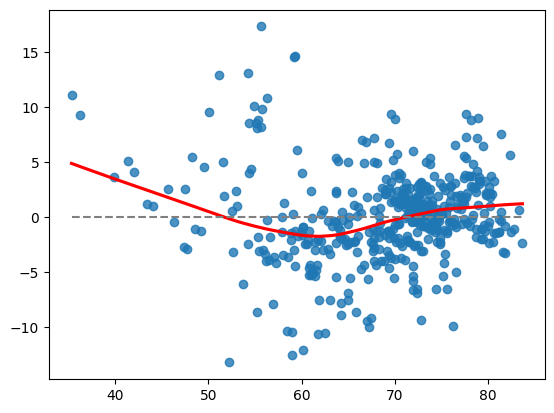

In [49]:
sns.regplot(x=y1_predict, y=residual, lowess=True, line_kws={'color': 'red'})
plt.plot([y1_predict.min(), y1_predict.max()], [0, 0], '--', color='grey')
plt.show()

In [50]:
stats.shapiro(residual)

ShapiroResult(statistic=0.9703935384750366, pvalue=6.549029052393962e-08)

## 3-5. 로그 취해보기(등분산성)

In [51]:
#로그 취하기

In [52]:
y1_train_log = np.log1p(y1_train)
y1_test_log = np.log1p(y1_test)

In [53]:
lm1_log = sm.OLS(y1_train_log, X1_train)
lm1_train_log = lm1_log.fit()

lm1_train_log.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         LifeExpectancy   R-squared:                       0.796
Model:                            OLS   Adj. R-squared:                  0.795
Method:                 Least Squares   F-statistic:                     775.1
Date:                Mon, 11 Dec 2023   Prob (F-statistic):               0.00
Time:                        04:09:03   Log-Likelihood:                 2290.8
No. Observations:                1800   AIC:                            -4562.
Df Residuals:                    1790   BIC:                            -4507.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                            4.0333      0.008    475.971      0.000       4.017       4.050
Diphtheria                       0.0008   7.48e-05     11.176      0.000       0.001       0.001
AdultMortality                  -0.0003   1.62e-05    -18.595      0.000      -0.000      -0.000
Measles                      -1.937e-07   1.61e-07     -1.199      0.231    -5.1e-07    1.23e-07
UnderFiveDeaths              -6.386e-05   1.32e-05     -4.853      0.000   -8.97e-05   -3.81e-05
HIV/AIDS                        -0.0081      0.000    -23.772      0.000      -0.009      -0.007
PercentageExpenditure        -1.722e-07   2.02e-06     -0.085      0.932   -4.14e-06     3.8e-06
GDP                           8.314e-07   3.39e-07      2.454      0.014    1.67e-07     1.5e-06
IncomeCompositionOfResources     0.3177      0.010     30.722      0.000       0.297       0.338
Population                    6.832e-11   2.96e-11      2.308      0.021    1.03e-11    1.26e-10
==============================================================================
Omnibus:                      216.765   Durbin-Watson:                   1.926
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1605.359
Skew:                          -0.294   Prob(JB):                         0.00
Kurtosis:                       7.589   Cond. No.                     5.16e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.16e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [54]:
y1_predict_log = lm1_train_log.predict(X1_test)

In [55]:
residual_log = y1_test_log.squeeze() - y1_predict_log

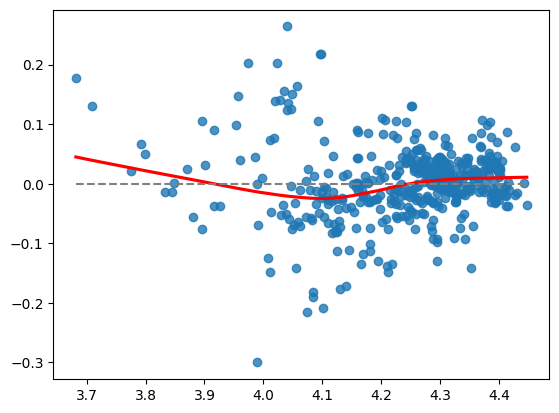

In [56]:
sns.regplot(x=y1_predict_log, y=residual_log, lowess=True, line_kws={'color': 'red'})
plt.plot([y1_predict_log.min(), y1_predict_log.max()], [0, 0], '--', color='grey')